# Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

#random seed
np.random.seed(4324)

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('../Data/validator_data.csv')

In [4]:
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,The Matrix Reloaded,2003-05-15,"Action,Sci-Fi",138.0,-,-,-,-,7.2,600147.0,6.916334,150000000,281553689,738576929
1,Paranormal Activity 4,2012-10-17,"Horror,Mystery",88.0,-,-,-,-,4.6,67577.0,3.632031,5000000,53900335,142817992
2,Down to You,2000-01-21,"Comedy,Drama,Romance",91.0,Kris Isacsson,"director,writer,editor",1972,alive,5.0,15307.0,3.413043,9000000,20035310,20035310
3,Things We Lost in the Fire,2007-10-19,Drama,118.0,Susanne Bier,"director,writer,producer",1960,alive,7.1,29100.0,5.237483,16000000,3287315,8120148
4,The Fighter,2010-12-10,"Action,Biography,Drama",116.0,David O. Russell,"producer,director,writer",1958,alive,7.8,372339.0,7.229725,11000000,93617009,129262388


## Feature Engineering

### Brakujące wartości

In [5]:
print('wartości brakujące w postaci "-":') #w większości tylko jeśli w ogóle nie ma info o reżyserze
for col in df.columns:
    if df[col][df[col] == '-'].count() > 0:
        print(col, df[col][df[col] == '-'].count())

print('\nwartości brakujące w postaci "\\N":')
for col in df.columns:
     if df[col][df[col] == '\\N'].count() > 0:
        print(col, df[col][df[col] == '\\N'].count())

print('\nliczba żywych rezyserów:')
for col in df.columns:
     if df[col][df[col] == "alive"].count() > 0:
        print(col, df[col][df[col] == 'alive'].count())

wartości brakujące w postaci "-":
director_name 61
director_professions 63
director_birthYear 61
director_deathYear 61

wartości brakujące w postaci "\N":
genres 2
director_birthYear 94

liczba żywych rezyserów:
director_deathYear 743


#### Zastąpienie brakujących wartości w kolumnie...
- "-" w imieniu reżysera zostawiamy na razie, zajmiemy się tym przy encodingu, przyjmujemy że to reżyser nieznany
- death year kolumna raczej do wyrzucenia, co eliminuje problem z nienumeryczną wartością alive
- w professions jak zamienimy na liczbę funkcji to możemy przyjąć że reżyser z imieniem nieznanym pełnił tylko jedną funkcję - reżyser, więc zastąpimy jedynką
- birth year też jak się zakoduje na młody, średni, stary (1,2,3) to wtedy można wylosować / sprawdzić czy jest zależnośc na podstawie której możnaby to lepiej przypisać

### Encoding zmiennych
#### Rozdzielenie dat - rok, miesiąc

In [6]:
#rozdzielenie dat
df["production_year"] = df["production_date"].str.split("-").str[0].astype(int)

#encoding miesiąca - kodowanie cykliczne
df["production_month"] = df["production_date"].str.split("-").str[1].astype(int)
df['month_sin'] = np.sin(2 * np.pi * df['production_month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['production_month']/12)

#usuwanie niepotrzebnych kolumn
#df = df.drop(columns=['production_date', 'production_month'])
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year,production_month,month_sin,month_cos
0,The Matrix Reloaded,2003-05-15,"Action,Sci-Fi",138.0,-,-,-,-,7.2,600147.0,6.916334,150000000,281553689,738576929,2003,5,5.000000e-01,-0.866025
1,Paranormal Activity 4,2012-10-17,"Horror,Mystery",88.0,-,-,-,-,4.6,67577.0,3.632031,5000000,53900335,142817992,2012,10,-8.660254e-01,0.500000
2,Down to You,2000-01-21,"Comedy,Drama,Romance",91.0,Kris Isacsson,"director,writer,editor",1972,alive,5.0,15307.0,3.413043,9000000,20035310,20035310,2000,1,5.000000e-01,0.866025
3,Things We Lost in the Fire,2007-10-19,Drama,118.0,Susanne Bier,"director,writer,producer",1960,alive,7.1,29100.0,5.237483,16000000,3287315,8120148,2007,10,-8.660254e-01,0.500000
4,The Fighter,2010-12-10,"Action,Biography,Drama",116.0,David O. Russell,"producer,director,writer",1958,alive,7.8,372339.0,7.229725,11000000,93617009,129262388,2010,12,-2.449294e-16,1.000000


#### Funkcje reżyserów - enkodowanie po liczbie pełnionych funkcji

In [7]:
# liczba zawodów reżysera
df['number_of_professions'] = df['director_professions'].apply(lambda x: len(x.split(',')))

#usuwamy niepotrzebną kolumnę
df.drop('director_professions', axis=1, inplace=True)

df.head()

# sprawdzamy unikalne wartości w kolumnie 'number_of_professions'
df['number_of_professions'].unique().tolist()

[1, 3, 2]

#### Imiona reżyserów - zmieniamy występujących raz na -, reszta zostaje + label encoding

In [8]:
len(df.director_name.unique().tolist())

618

In [9]:
small_director_name = df["director_name"].value_counts()[df['director_name'].value_counts() == 1].index
small_director_name

Index(['Peter Lepeniotis', 'David Anspaugh', 'George Ratliff',
       'Nicholas Stoller', 'James Frawley', 'Olivier Megaton', 'Colin Nutley',
       'Ernie Barbarash', 'Gordon Chan', 'Peter Hedges',
       ...
       'Peter Jackson', 'John Milius', 'Kevin Costner', 'Neil Marshall',
       'Hugh Johnson', 'David Dobkin', 'Brian Kirk', 'Nelson Dilipkumar',
       'David Twohy', 'E. Elias Merhige'],
      dtype='object', length=488)

In [10]:
df["director_name"] = np.where(df["director_name"].isin(small_director_name), '-', df["director_name"])
df["director_name"].value_counts()

-                     549
James Wan               5
Ron Howard              5
Clint Eastwood          5
Kenneth Branagh         5
                     ... 
Bryan Singer            2
David Gordon Green      2
David Koepp             2
David O. Russell        2
Brian Robbins           2
Name: director_name, Length: 130, dtype: int64

In [11]:
#encode director_name
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['director_name'] = labelencoder.fit_transform(df['director_name'])

#### Zamiana daty urodzenia reżysera, podział na klasy wieku 1,2,3 (młody, średni, stary)
##### data śmierci raczej się nie przyda - usuwamy

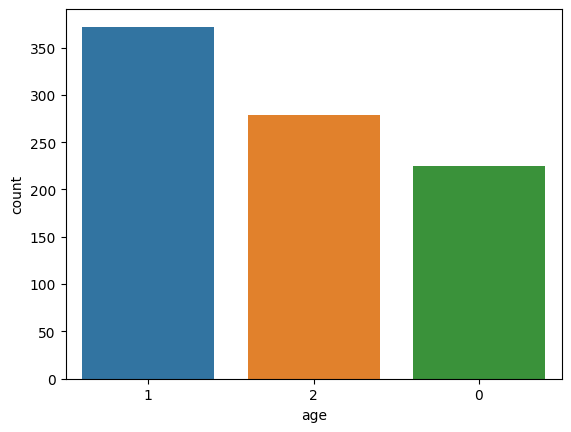

In [12]:

# usunięcie kolumny 'death_year'
df.drop('director_deathYear', axis=1, inplace=True)

# zastąpienie wartości '-' w kolumnie 'director_birthYear' wartością NaN
df['director_birthYear'] = df['director_birthYear'].replace('-', np.nan)
# zamiana typu kolumny 'director_birthYear' na int
df['director_birthYear'] = pd.to_numeric(df['director_birthYear'], errors='coerce')
# utworzenie kolumny 'age' na podstawie kolumn 'production_year' i 'director_birthYear', jesli nie ma birthYear to age = 0
df['age'] = df['production_year'] - df['director_birthYear']
# podział age na 3 przedziały wiekowe
df['age'] = pd.cut(df['age'], bins=[0, 40, 55, 200], labels=['young', 'middle-aged', 'old'])
# encoding kolumny age na int
df['age'] = df['age'].map({'young': 0, 'middle-aged': 1, 'old': 2})
# zamiana wartości NaN na losowe wartości z przedziału (0, 2)
df['age'] = df['age'].fillna(np.random.randint(0, 3))
# usunięcie kolumny 'director_birthYear'
df.drop('director_birthYear', axis=1, inplace=True)

df.head()

countplot = sns.countplot(data=df, x='age', order = df['age'].value_counts().index)

### Podejrzane duplikaty: model ML, który naprawia budżety filmów o tych samych nazwach i dniach produkcji, które faktycznie są innymi filmami

In [13]:
counts = df.groupby(['movie_title', 'production_date']).size()

# Wybierz tylko te wartości, które występują więcej niż raz
counts = counts[counts > 1]

# Konwersja do ramki danych
counts = counts.reset_index(name='count')

In [14]:
counts.head()

,movie_title,production_date,count
0,Abduction,2011-09-23,2
1,Quarantine,2008-10-10,2
2,The Walk,2015-09-30,2


In [15]:
from sklearn.ensemble import RandomForestRegressor


In [16]:
df_ml = df[["movie_title", 'production_date', "movie_averageRating", "movie_numerOfVotes", "approval_Index", "Production budget $", "Domestic gross $", "Worldwide gross $"]]
counted = df_ml[df_ml["movie_title"].isin(counts["movie_title"])]
non_counted = df_ml[~df_ml["movie_title"].isin(counts["movie_title"])]
non_counted = non_counted[:5000]
y_train = non_counted[["Production budget $", "Domestic gross $", "Worldwide gross $"]]
X_train = non_counted[["movie_averageRating", "movie_numerOfVotes", "approval_Index"]]
X_test = counted[["movie_averageRating", "movie_numerOfVotes", "approval_Index"]]
model = RandomForestRegressor()
predictions = {}

for col in y_train.columns:
    model.fit(X_train, y_train[col])
    predictions[col] = model.predict(X_test)




In [17]:

predictions_df = pd.DataFrame(predictions, index=counted.index)
counted = counted.drop(["Production budget $", "Domestic gross $", "Worldwide gross $"], axis=1)
# Połączenie danych testowych z przewidywanymi wartościami
new_df = pd.concat([counted.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)


In [18]:
new_df

,movie_title,production_date,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,The Walk,2015-09-30,7.3,130247.0,6.193678,26975000.0,42969745.14,8.847313e+07
1,Quarantine,2008-10-10,4.0,163.0,1.367264,12868500.0,6775490.11,1.735026e+07
2,The Walk,2015-09-30,6.0,141.0,2.052804,19737500.0,6687686.26,8.727626e+06
3,Abduction,2011-09-23,5.9,13.0,0.981598,55381000.0,70928406.03,1.893809e+08
4,Quarantine,2008-10-10,5.9,74611.0,4.738714,63565000.0,39094158.87,1.328457e+08
5,Abduction,2011-09-23,5.1,81365.0,4.110818,68170000.0,36395731.33,1.081089e+08


In [19]:
merged_df = pd.merge(df, new_df[['movie_title', 'production_date', 'movie_averageRating', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']], 
                     on=['movie_title', 'production_date', 'movie_averageRating'], how='left')
merged_df


,movie_title,production_date,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $_x,Domestic gross $_x,Worldwide gross $_x,production_year,production_month,month_sin,month_cos,number_of_professions,age,Production budget $_y,Domestic gross $_y,Worldwide gross $_y
0,The Matrix Reloaded,2003-05-15,"Action,Sci-Fi",138.0,0,7.2,600147.0,6.916334,150000000,281553689,738576929,2003,5,5.000000e-01,-0.866025,1,2,NaN,NaN,NaN
1,Paranormal Activity 4,2012-10-17,"Horror,Mystery",88.0,0,4.6,67577.0,3.632031,5000000,53900335,142817992,2012,10,-8.660254e-01,0.500000,1,2,NaN,NaN,NaN
2,Down to You,2000-01-21,"Comedy,Drama,Romance",91.0,0,5.0,15307.0,3.413043,9000000,20035310,20035310,2000,1,5.000000e-01,0.866025,3,0,NaN,NaN,NaN
3,Things We Lost in the Fire,2007-10-19,Drama,118.0,0,7.1,29100.0,5.237483,16000000,3287315,8120148,2007,10,-8.660254e-01,0.500000,3,1,NaN,NaN,NaN
4,The Fighter,2010-12-10,"Action,Biography,Drama",116.0,33,7.8,372339.0,7.229725,11000000,93617009,129262388,2010,12,-2.449294e-16,1.000000,3,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,Manchester by the Sea,2016-11-17,Drama,137.0,0,7.8,287419.0,7.081167,8500000,47695371,77733867,2016,11,-5.000000e-01,0.866025,3,1,NaN,NaN,NaN
872,Code Name: The Cleaner,2007-01-05,"Action,Comedy,Crime",84.0,0,4.6,11885.0,3.043816,20000000,8135024,8135024,2007,1,5.000000e-01,0.866025,3,2,NaN,NaN,NaN
873,Papillon,1973-12-16,"Biography,Crime,Drama",151.0,0,8.0,132395.0,6.809861,13500000,53267000,53292989,1973,12,-2.449294e-16,1.000000,3,1,NaN,NaN,NaN
874,How the Grinch Stole Christmas,2000-11-17,"Comedy,Family,Fantasy",104.0,107,6.3,265976.0,5.658113,123000000,260348825,345445403,2000,11,-5.000000e-01,0.866025,3,1,NaN,NaN,NaN


In [20]:
merged_df['Production budget $'] = merged_df['Production budget $_y'].fillna(merged_df['Production budget $_x'])
merged_df['Domestic gross $'] = merged_df['Domestic gross $_y'].fillna(merged_df['Domestic gross $_x'])
merged_df['Worldwide gross $'] = merged_df['Worldwide gross $_y'].fillna(merged_df['Worldwide gross $_x'])

# Usunięcie zbędnych kolumn
merged_df.drop(['Production budget $_x', 'Domestic gross $_x', 'Worldwide gross $_x',
                'Production budget $_y', 'Domestic gross $_y', 'Worldwide gross $_y'], axis=1, inplace=True)


In [21]:
merged_df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,production_month,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $
0,The Matrix Reloaded,2003-05-15,"Action,Sci-Fi",138.0,0,7.2,600147.0,6.916334,2003,5,5.000000e-01,-0.866025,1,2,150000000.0,281553689.0,738576929.0
1,Paranormal Activity 4,2012-10-17,"Horror,Mystery",88.0,0,4.6,67577.0,3.632031,2012,10,-8.660254e-01,0.500000,1,2,5000000.0,53900335.0,142817992.0
2,Down to You,2000-01-21,"Comedy,Drama,Romance",91.0,0,5.0,15307.0,3.413043,2000,1,5.000000e-01,0.866025,3,0,9000000.0,20035310.0,20035310.0
3,Things We Lost in the Fire,2007-10-19,Drama,118.0,0,7.1,29100.0,5.237483,2007,10,-8.660254e-01,0.500000,3,1,16000000.0,3287315.0,8120148.0
4,The Fighter,2010-12-10,"Action,Biography,Drama",116.0,33,7.8,372339.0,7.229725,2010,12,-2.449294e-16,1.000000,3,1,11000000.0,93617009.0,129262388.0


In [22]:
merged_df[merged_df['movie_title'] == 'Weekend'].head()


,movie_title,production_date,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,production_month,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $


In [23]:
df = merged_df

In [24]:
df = df.drop(columns=['production_date', 'production_month'])

In [25]:
df.head()

,movie_title,genres,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $
0,The Matrix Reloaded,"Action,Sci-Fi",138.0,0,7.2,600147.0,6.916334,2003,5.000000e-01,-0.866025,1,2,150000000.0,281553689.0,738576929.0
1,Paranormal Activity 4,"Horror,Mystery",88.0,0,4.6,67577.0,3.632031,2012,-8.660254e-01,0.500000,1,2,5000000.0,53900335.0,142817992.0
2,Down to You,"Comedy,Drama,Romance",91.0,0,5.0,15307.0,3.413043,2000,5.000000e-01,0.866025,3,0,9000000.0,20035310.0,20035310.0
3,Things We Lost in the Fire,Drama,118.0,0,7.1,29100.0,5.237483,2007,-8.660254e-01,0.500000,3,1,16000000.0,3287315.0,8120148.0
4,The Fighter,"Action,Biography,Drama",116.0,33,7.8,372339.0,7.229725,2010,-2.449294e-16,1.000000,3,1,11000000.0,93617009.0,129262388.0


### Skalowanie - logarytmiczne

array([[<Axes: title={'center': 'runtime_minutes'}>,
        <Axes: title={'center': 'director_name'}>,
        <Axes: title={'center': 'movie_averageRating'}>],
       [<Axes: title={'center': 'movie_numerOfVotes'}>,
        <Axes: title={'center': 'approval_Index'}>,
        <Axes: title={'center': 'production_year'}>],
       [<Axes: title={'center': 'month_sin'}>,
        <Axes: title={'center': 'month_cos'}>,
        <Axes: title={'center': 'number_of_professions'}>],
       [<Axes: title={'center': 'Production budget $'}>,
        <Axes: title={'center': 'Domestic gross $'}>,
        <Axes: title={'center': 'Worldwide gross $'}>]], dtype=object)

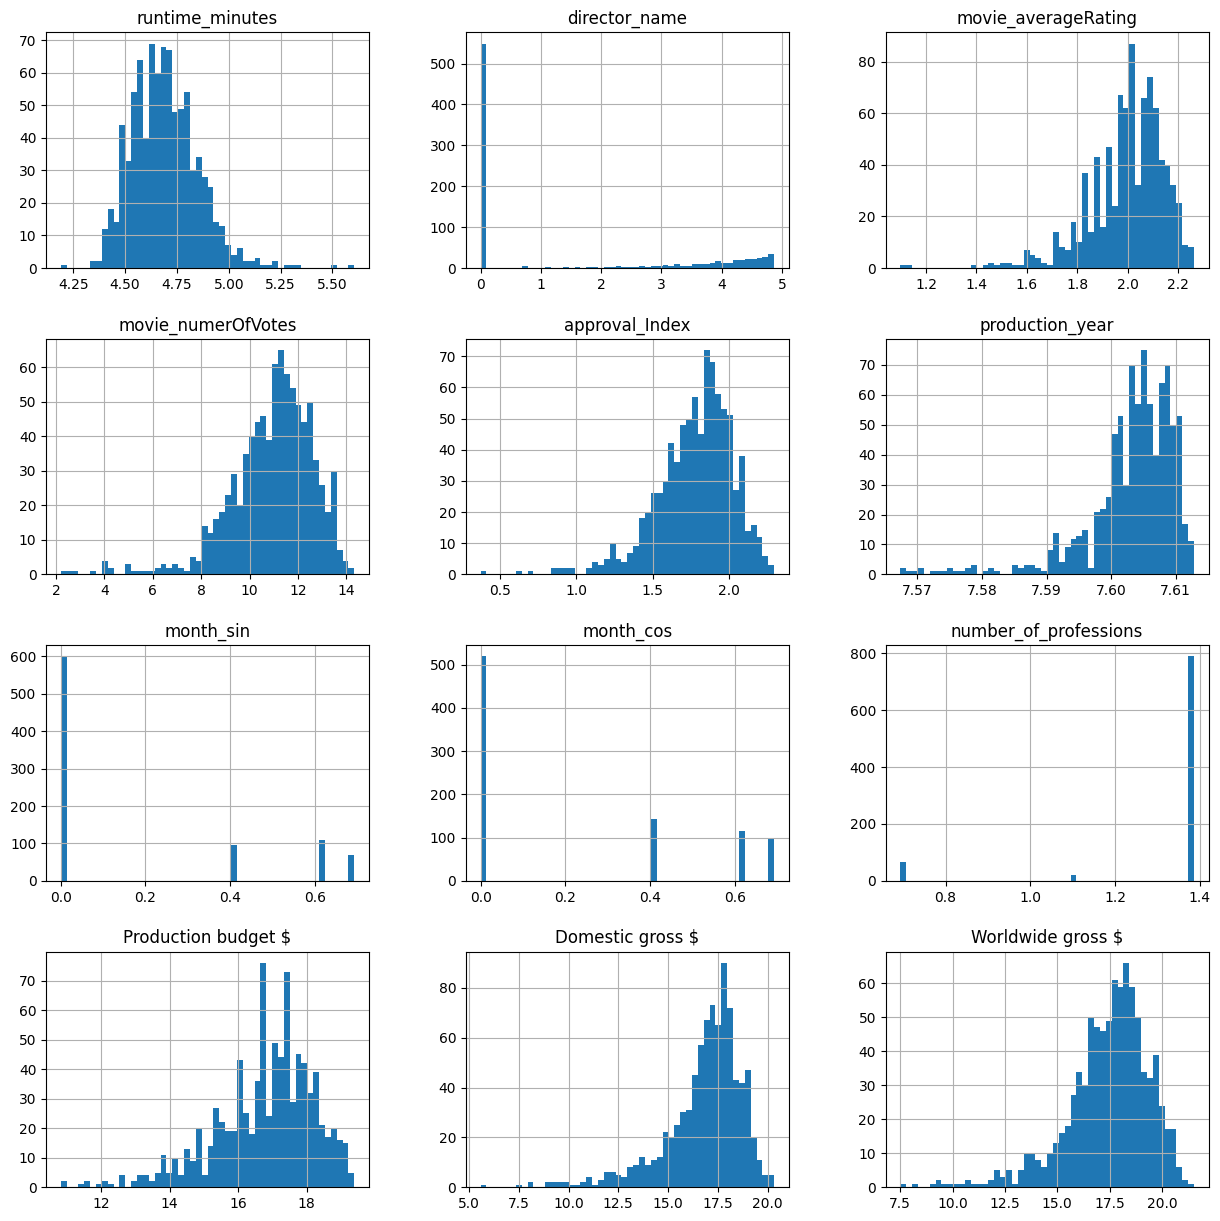

In [26]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
# Zastąp wartości ujemne i zero małą dodatnią wartością
df[numerical_cols] = df[numerical_cols].applymap(lambda x: x if x > 0 else 1e-10)

# Przekształcenie logarytmiczne
df_log = np.log1p(df[numerical_cols])

# Rysowanie histogramu
df_log.hist(bins=50, figsize=(15, 15))
#testy modeli bedzie mozna zrobic na obu wersjach

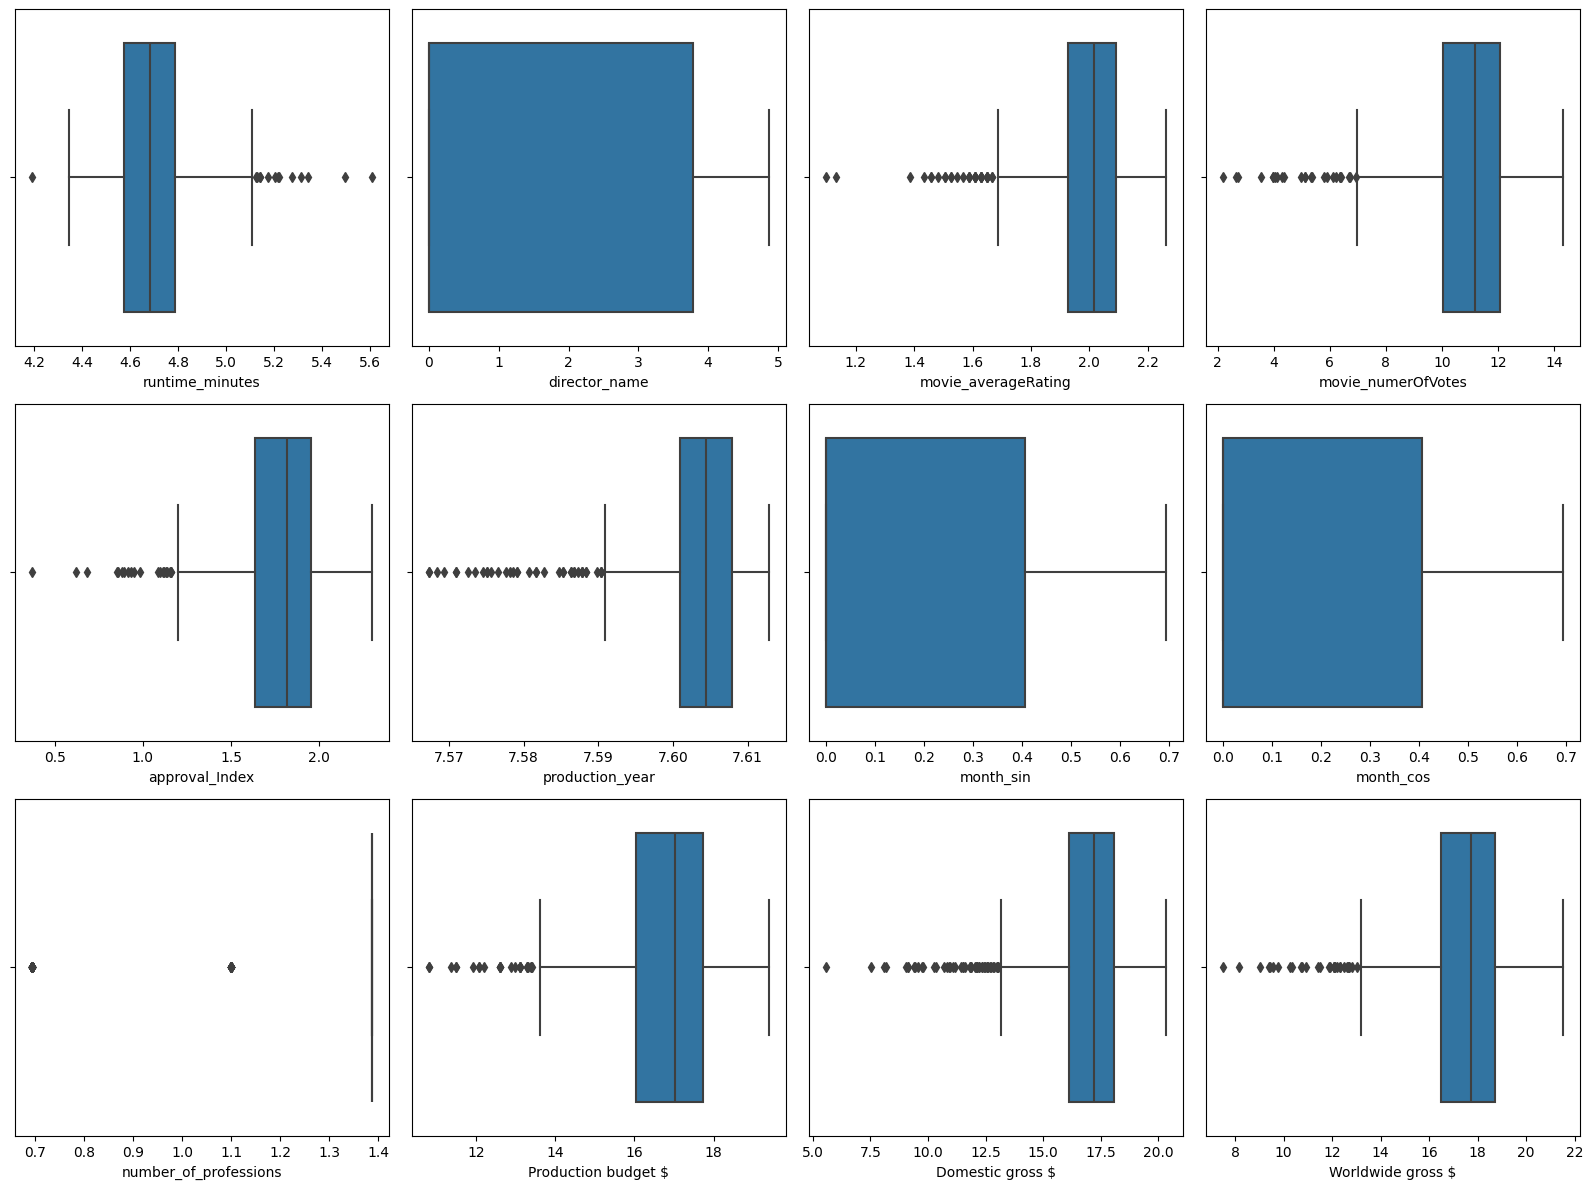

In [27]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
axes = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=col, data=np.log1p(df[numerical_cols]), ax= axes[i])
plt.tight_layout() 
plt.show()

### Różne typy transformacji zmiennych numerycznych + pomijamy outliery, zmienne wpisują się w rozkłady

#### Gatunki one hot encoding

In [28]:
#### Gatunki - one hot encoding
# One-hot encoding gatunków
genres_one_hot = df['genres'].str.get_dummies(sep=',')
df = pd.concat([df, genres_one_hot], axis=1)

#usuwanie niepotrzebnych kolumn
df.drop('genres', axis=1, inplace=True)
df.head()

,movie_title,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,\N
0,The Matrix Reloaded,138.0,1.000000e-10,7.2,600147.0,6.916334,2003,5.000000e-01,1.000000e-10,1,2,150000000.0,281553689.0,738576929.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Paranormal Activity 4,88.0,1.000000e-10,4.6,67577.0,3.632031,2012,1.000000e-10,5.000000e-01,1,2,5000000.0,53900335.0,142817992.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,Down to You,91.0,1.000000e-10,5.0,15307.0,3.413043,2000,5.000000e-01,8.660254e-01,3,0,9000000.0,20035310.0,20035310.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Things We Lost in the Fire,118.0,1.000000e-10,7.1,29100.0,5.237483,2007,1.000000e-10,5.000000e-01,3,1,16000000.0,3287315.0,8120148.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Fighter,116.0,3.300000e+01,7.8,372339.0,7.229725,2010,1.000000e-10,1.000000e+00,3,1,11000000.0,93617009.0,129262388.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Skala logarytmiczna

array([[<Axes: title={'center': 'runtime_minutes'}>,
        <Axes: title={'center': 'director_name'}>,
        <Axes: title={'center': 'movie_averageRating'}>],
       [<Axes: title={'center': 'movie_numerOfVotes'}>,
        <Axes: title={'center': 'approval_Index'}>,
        <Axes: title={'center': 'production_year'}>],
       [<Axes: title={'center': 'month_sin'}>,
        <Axes: title={'center': 'month_cos'}>,
        <Axes: title={'center': 'number_of_professions'}>],
       [<Axes: title={'center': 'Production budget $'}>,
        <Axes: title={'center': 'Domestic gross $'}>,
        <Axes: title={'center': 'Worldwide gross $'}>]], dtype=object)

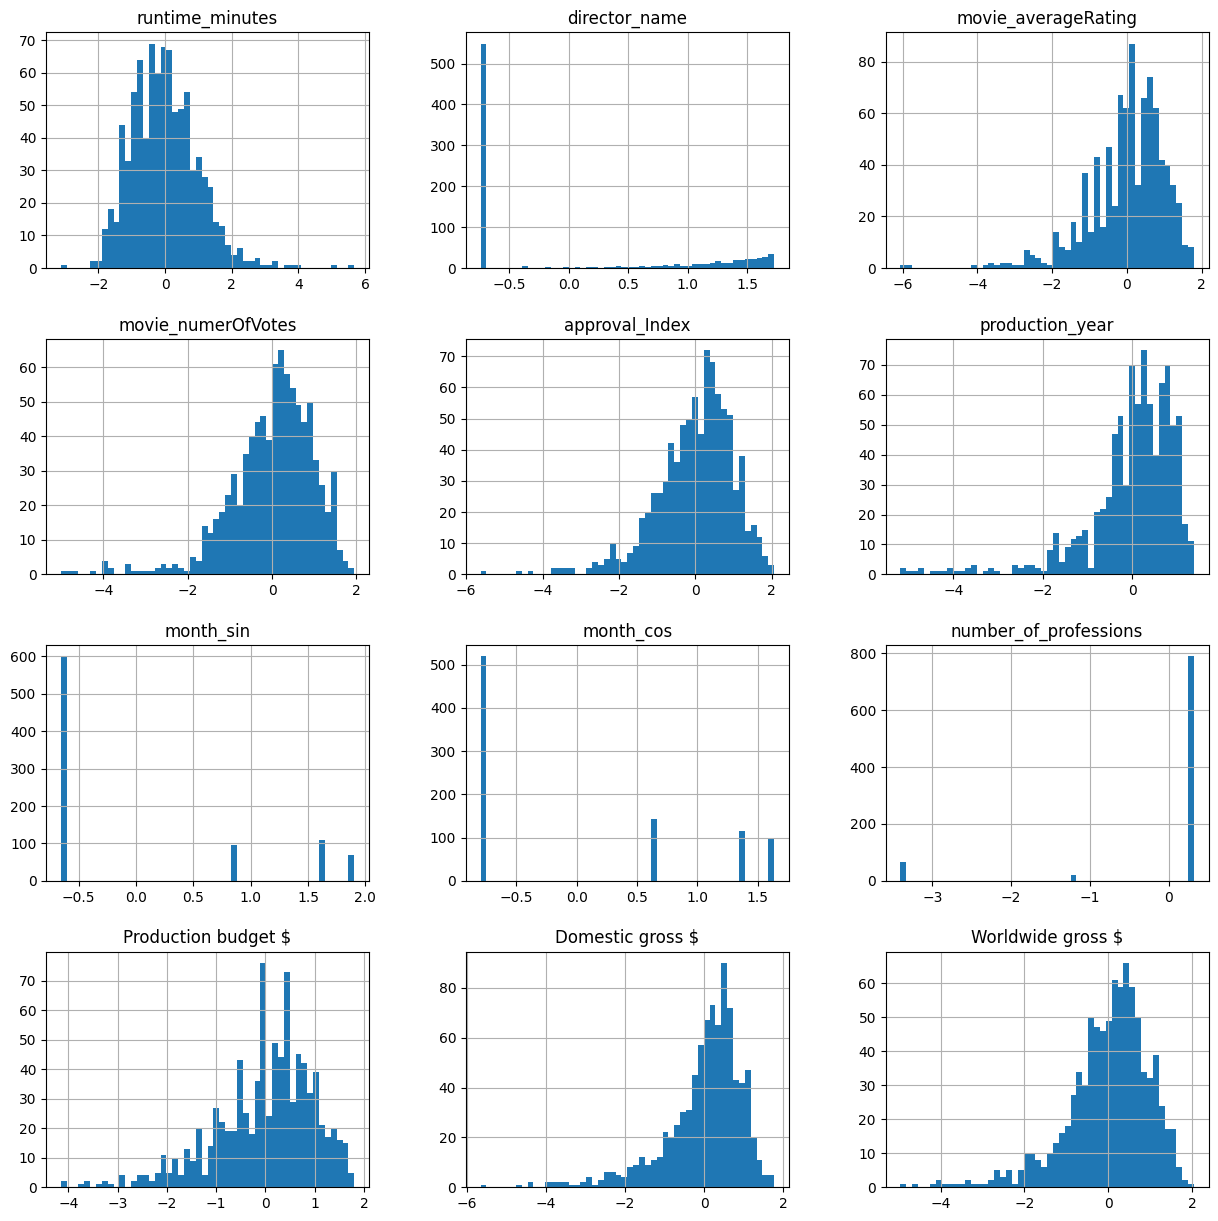

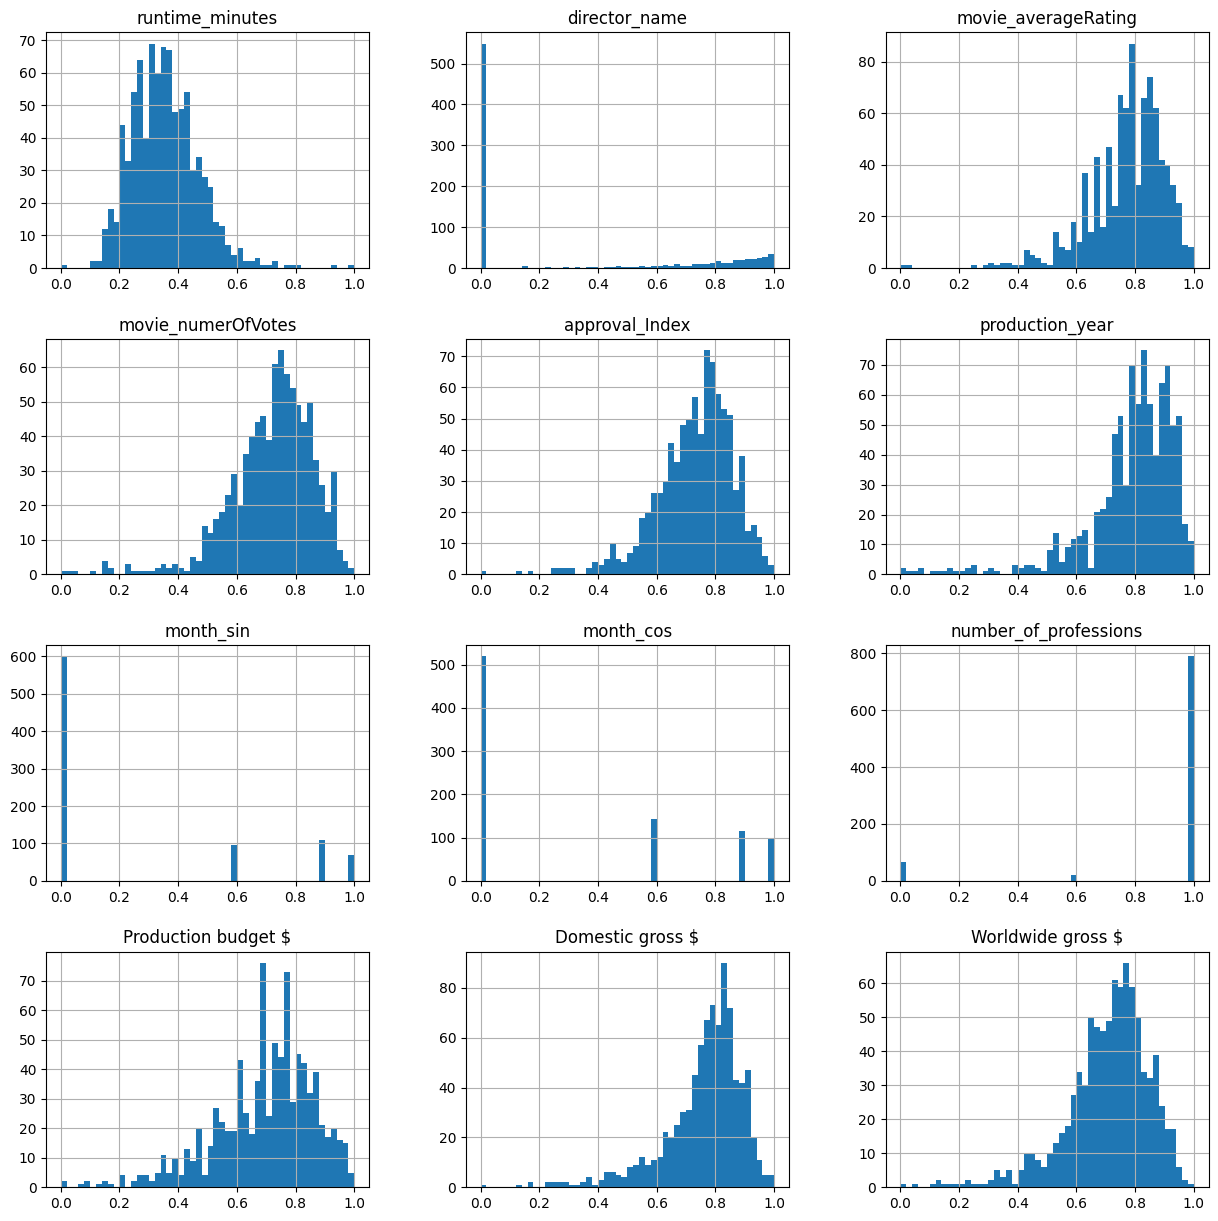

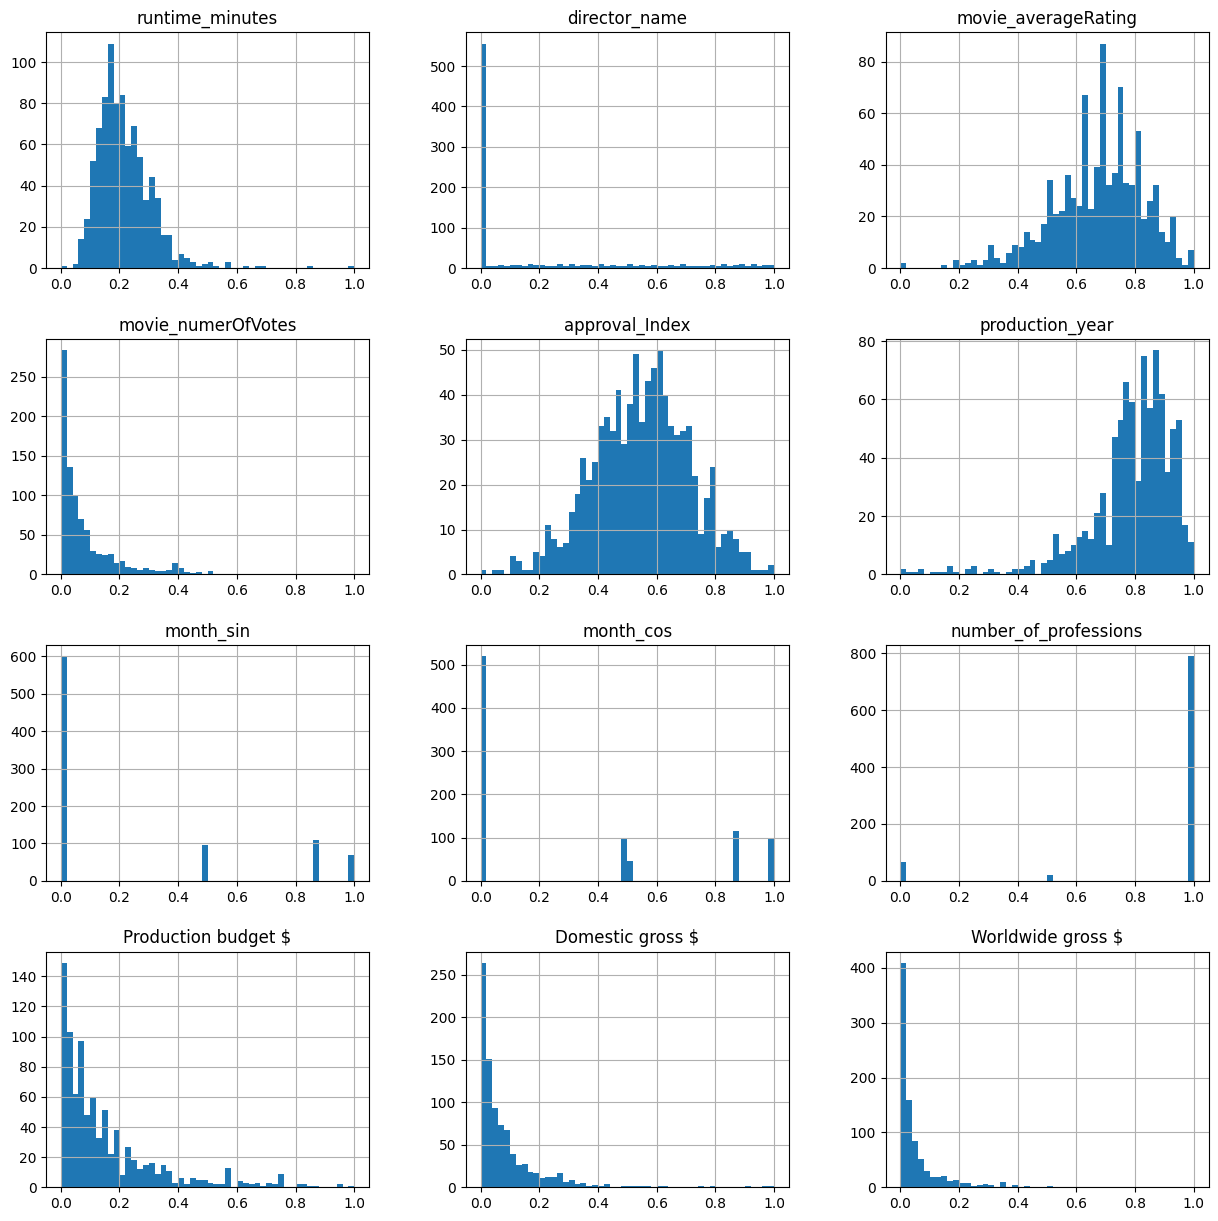

In [29]:
# df_log - logarytmiczne przekształcenie już zrobione
# df - oryginalne dane

# Standaryzacja
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_log_scaled = scaler.fit_transform(df_log)
df_log_scaled = pd.DataFrame(df_log_scaled, columns=df_log.columns)

# Normalizacja
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_log_normalized = scaler.fit_transform(df_log[numerical_cols])
df_log_normalized = pd.DataFrame(df_log_normalized, columns=numerical_cols)

# Standaryzacja + Normalizacja bez logarytmicznego przekształcenia (uzywajac df)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_scaled[numerical_cols])
df_normalized_scaled = pd.DataFrame(df_normalized, columns=numerical_cols)



# Sprawdzenie rozkładu
df_log_scaled.hist(bins=50, figsize=(15, 15))
df_log_normalized.hist(bins=50, figsize=(15, 15))
df_normalized_scaled.hist(bins=50, figsize=(15, 15))



In [30]:
df.head()

,movie_title,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,\N
0,The Matrix Reloaded,138.0,1.000000e-10,7.2,600147.0,6.916334,2003,5.000000e-01,1.000000e-10,1,2,150000000.0,281553689.0,738576929.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Paranormal Activity 4,88.0,1.000000e-10,4.6,67577.0,3.632031,2012,1.000000e-10,5.000000e-01,1,2,5000000.0,53900335.0,142817992.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,Down to You,91.0,1.000000e-10,5.0,15307.0,3.413043,2000,5.000000e-01,8.660254e-01,3,0,9000000.0,20035310.0,20035310.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Things We Lost in the Fire,118.0,1.000000e-10,7.1,29100.0,5.237483,2007,1.000000e-10,5.000000e-01,3,1,16000000.0,3287315.0,8120148.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,The Fighter,116.0,3.300000e+01,7.8,372339.0,7.229725,2010,1.000000e-10,1.000000e+00,3,1,11000000.0,93617009.0,129262388.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Sprawdzamy Feature Importance

W przypadku klasteryzacji określenie najważniejszych cech jest bardziej skomplikowane bo nie przewidujemy nic, ale tu feature importance za pomocą kilku metoda:

Feature importance za pomocą pca (analizy głównych składowych).

Feature ranking:
1. Feature: month_sin (0.03868159128776309)
2. Feature: month_cos (-0.0366846276679306)
3. Feature: production_year (-0.05230490187011738)
4. Feature: number_of_professions (-0.0531341864719982)
5. Feature: director_name (-0.173877243140187)
6. Feature: runtime_minutes (-0.25927124694384723)
7. Feature: movie_averageRating (-0.27005282409994663)
8. Feature: Production budget $ (-0.3361403314160413)
9. Feature: Domestic gross $ (-0.40270489185318314)
10. Feature: approval_Index (-0.416805821194981)
11. Feature: Worldwide gross $ (-0.4265741350052644)
12. Feature: movie_numerOfVotes (-0.436304237332092)


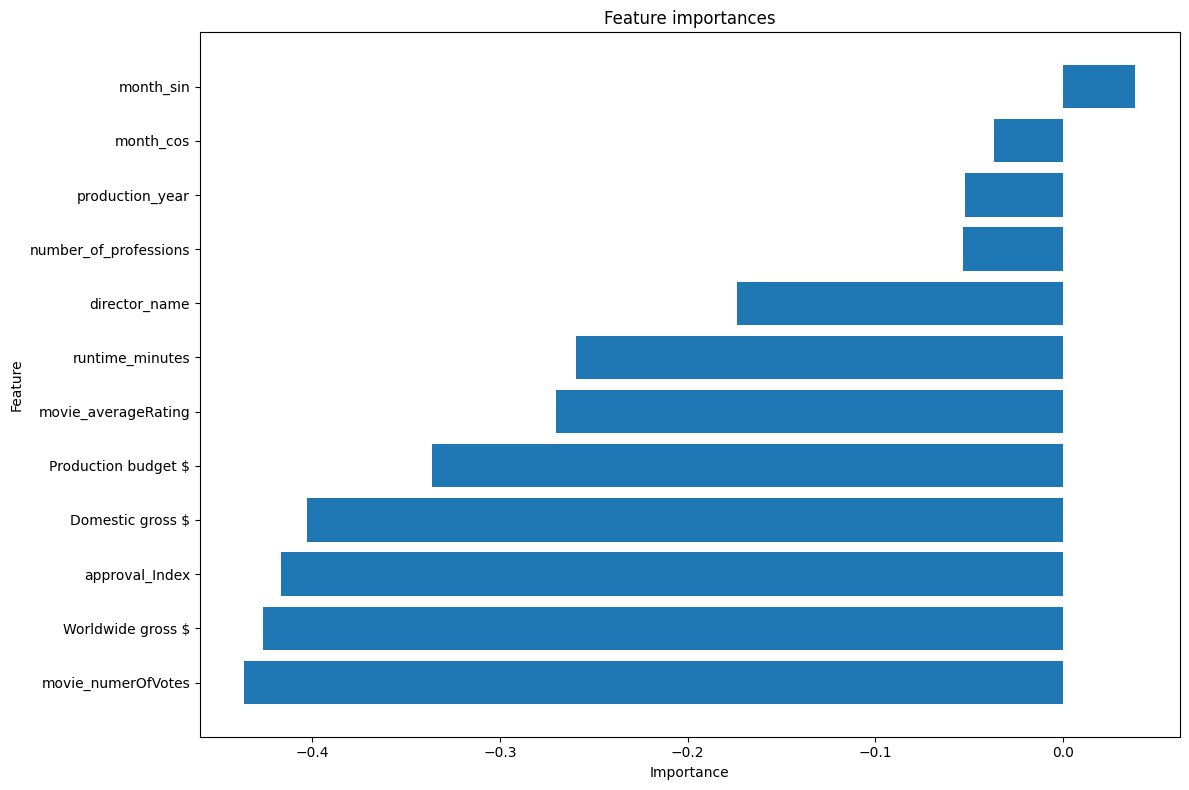

In [31]:
from sklearn.decomposition import PCA
X = df_log_scaled
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

features = df_log_scaled.columns
loadings = pca.components_

importance_df = pd.DataFrame({'Feature': features, 'Importance': loadings[0]})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importances = importance_df['Importance'].values
features = importance_df['Feature'].values

print("Feature ranking:")
for i in range(len(importances)):
    print(f"{i + 1}. Feature: {features[i]} ({importances[i]})")

plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.barh(range(len(importances)), importances, align="center")
plt.yticks(range(len(importances)), features)
plt.ylim([-1, len(importances)])
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


dziekie jakies cos

Feature importance za pomocą analizy skupień na podstawie cech. Klasteryzujemy cechy.

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Remove rows with NaN values
X = X.dropna()

# Or replace NaN values with the mean of the column
# X = X.fillna(X.mean())

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Transpose the feature matrix so that features become rows
X_transposed = X.T

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_transposed_scaled = scaler.fit_transform(X_transposed)

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_transposed_scaled)

# Get cluster assignments for each feature
clusters = kmeans.labels_

# Create a DataFrame for visualization
cluster_df = pd.DataFrame({'Feature': X.columns, 'Cluster': clusters})

print(cluster_df)

                  Feature  Cluster
0         runtime_minutes        0
1           director_name        2
2     movie_averageRating        0
3      movie_numerOfVotes        0
4          approval_Index        0
5         production_year        1
6               month_sin        1
7               month_cos        0
8   number_of_professions        0
9     Production budget $        1
10       Domestic gross $        1
11      Worldwide gross $        1


## Wstępne modelowanie  
-metoda łokcia  
-tsne  
-kmeans  
-wstępne wyszukiwanie

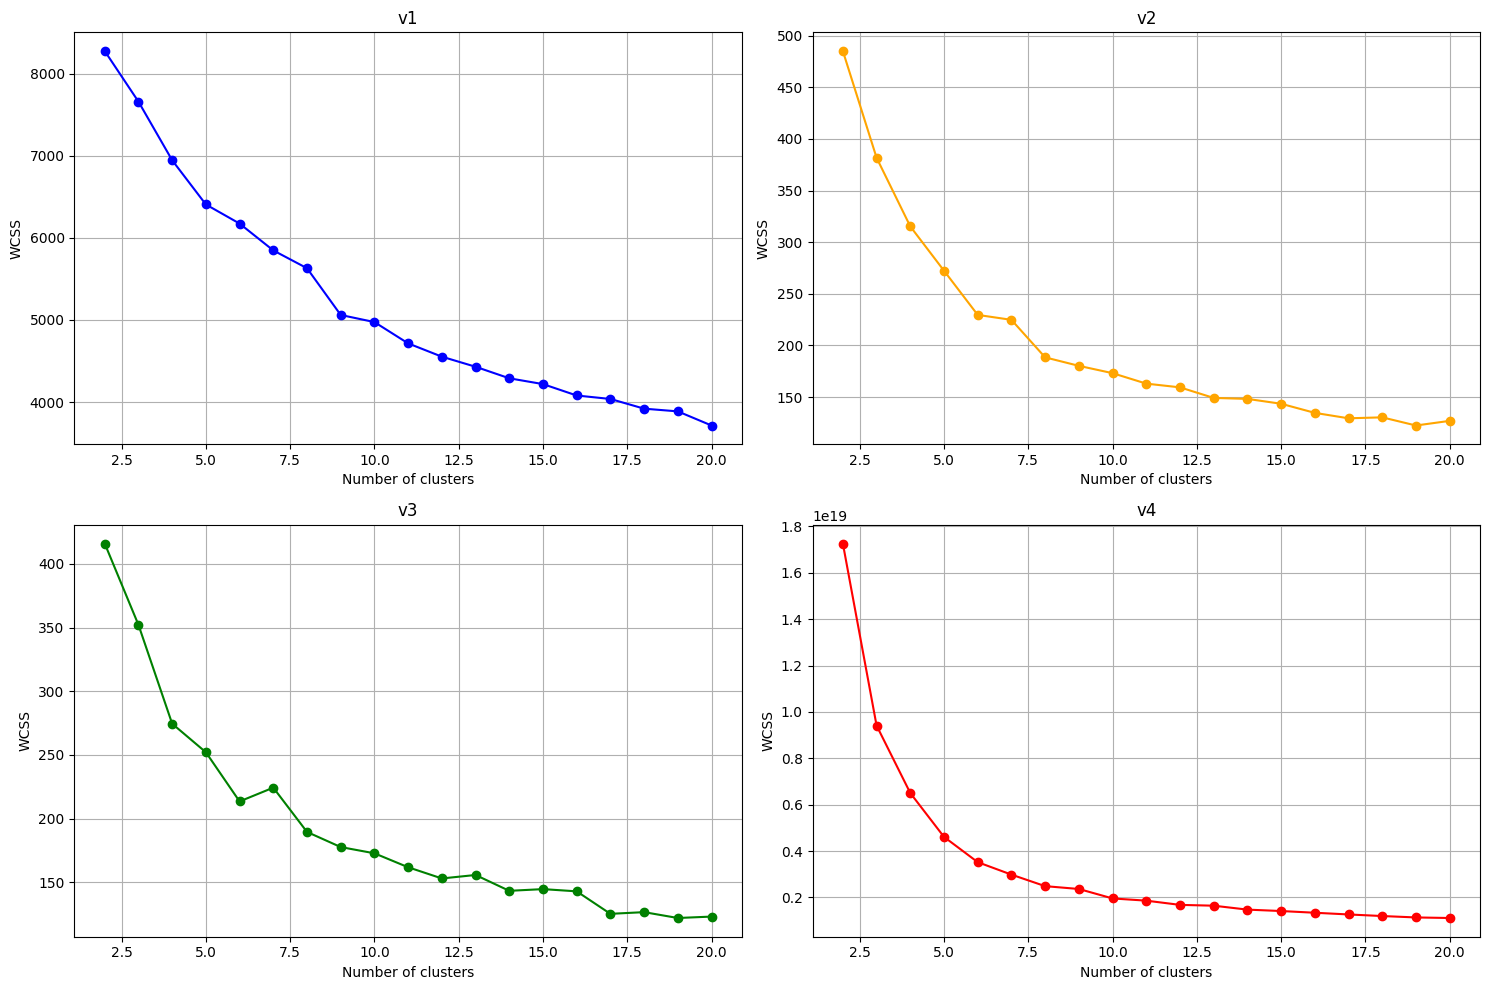

In [33]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

v1= df_log_scaled
v2= df_log_normalized
v3= df_normalized_scaled
v4= df.drop("movie_title", axis=1)
mod = v4.drop(["month_sin", "month_cos", "number_of_professions", "production_year"], axis=1)

#save the different versions of the dataset
v1.to_csv('../Data/v_log_scaled.csv', index=False)
v2.to_csv('../Data/v_log_normalized.csv', index=False)
v3.to_csv('../Data/v_raw_normalized_scaled.csv', index=False)
v4.to_csv('../Data/v_no_standarization.csv', index=False)
mod.to_csv('../Data/v_removed_columns_no_standarization.csv', index=False)


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

# Assuming v1, v2, v3, and v4 are your datasets
wcss_v1 = calculate_wcss(v1)
wcss_v2 = calculate_wcss(v2)
wcss_v3 = calculate_wcss(v3)
wcss_v4 = calculate_wcss(v4)


# Assuming wcss_v1, wcss_v2, wcss_v3, and wcss_v4 are defined lists
wcss_list = [wcss_v1, wcss_v2, wcss_v3, wcss_v4]
titles = ['v1', 'v2', 'v3', 'v4']
colors = ['b', 'orange', 'green', 'r']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (wcss, title, color) in enumerate(zip(wcss_list, titles, colors)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(range(2, 21), wcss, marker='o', color=color)
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel('Number of clusters')
    axs[row, col].set_ylabel('WCSS')
    axs[row, col].grid()

plt.tight_layout()
plt.show()



v1= df_log_scaled  
v2= df_log_normalized  
v3= df_normalized_scaled  
v4= df.drop("movie_title", axis=1)  

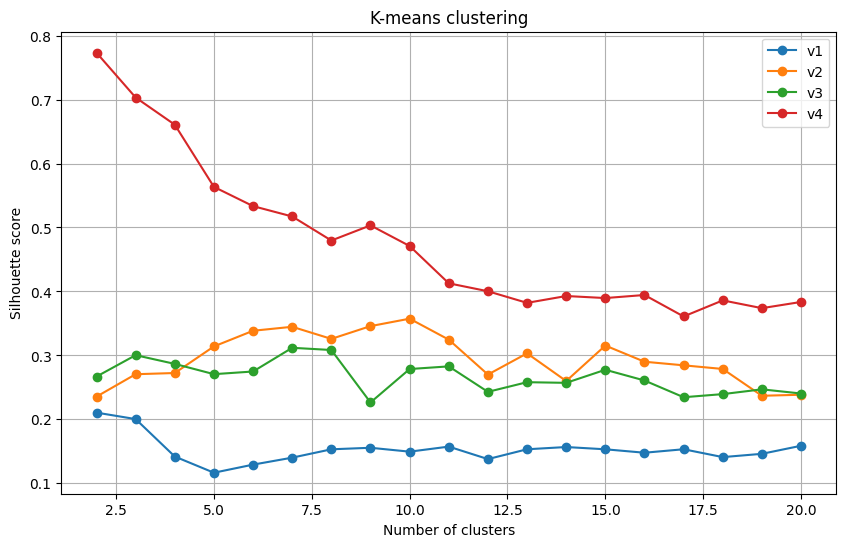

In [34]:
#silhouette score
from sklearn.metrics import silhouette_score

def calculate_silhouette_score(data):
    silhouette_scores = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return silhouette_scores

silhouette_scores_v1 = calculate_silhouette_score(v1)
silhouette_scores_v2 = calculate_silhouette_score(v2)
silhouette_scores_v3 = calculate_silhouette_score(v3)
silhouette_scores_v4 = calculate_silhouette_score(v4)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores_v1, marker='o', label='v1')
plt.plot(range(2, 21), silhouette_scores_v2, marker='o', label='v2')
plt.plot(range(2, 21), silhouette_scores_v3, marker='o', label='v3')
plt.plot(range(2, 21), silhouette_scores_v4, marker='o', label='v4')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('K-means clustering')
plt.legend()
plt.grid()
plt.show()

znowu, v4 wygląda najbardziej sensownie 

In [35]:
# co robi silhoutte score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# silhouette score - miara jakości podziału
# wartości z przedziału [-1, 1]
# im bliżej 1 tym lepiej
# 0 oznacza przypadek, gdy klastry się nakładają
# wartości ujemne oznaczają, że obserwacje zostały przypisane do złego klastra - a to chyba u nas nie jest aplikowalne

### TSNE

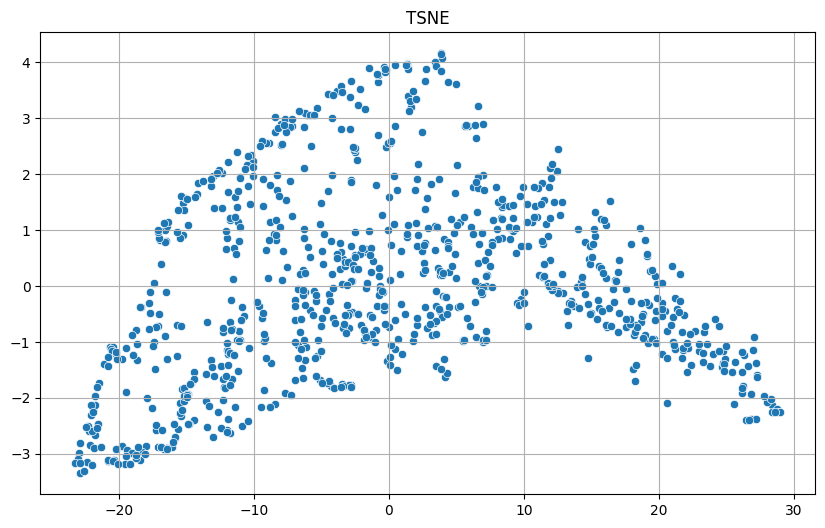

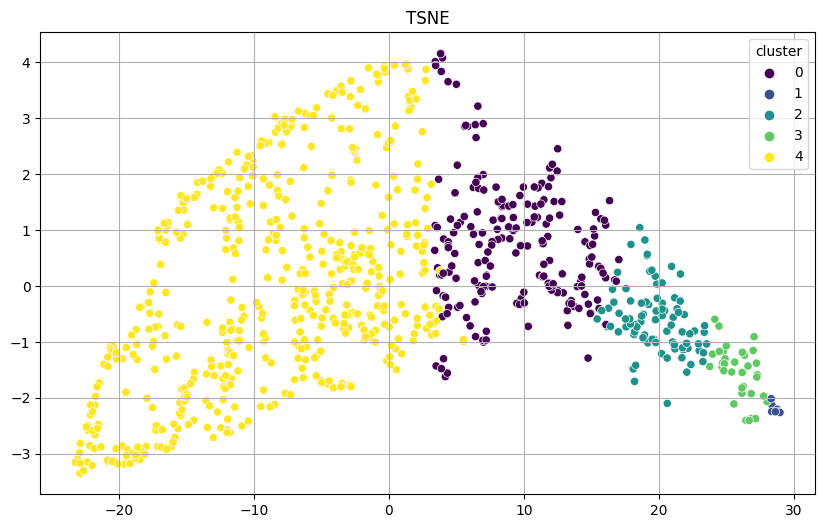

In [36]:
#tsne na wariancie v4
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=4324)
tsne_results = tsne.fit_transform(v4)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('TSNE')
plt.grid()
plt.show()

#scatter plot na 5 klastrów
kmeans = KMeans(n_clusters=5, random_state=4324)
kmeans.fit(v4)
v4['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=v4['cluster'], palette='viridis')
plt.title('TSNE')
plt.grid()
plt.show()


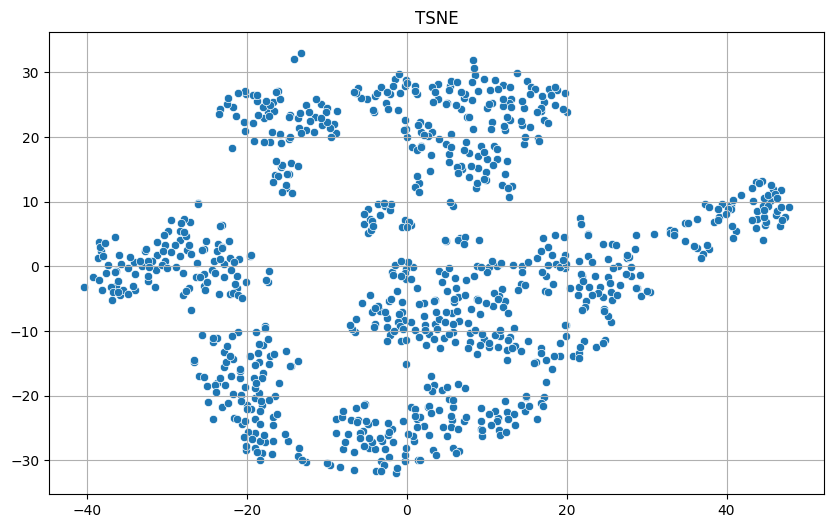

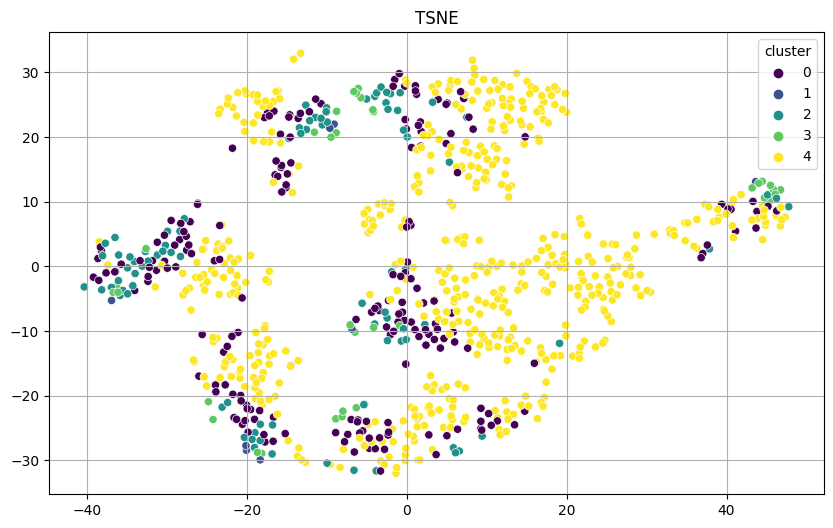

In [37]:
#tsne na wariancie v1
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=4324)
tsne_results = tsne.fit_transform(v1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('TSNE')
plt.grid()
plt.show()

#scatter plot na 5 klastrów
kmeans = KMeans(n_clusters=5, random_state=4324)
kmeans.fit(v4)
v4['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=v4['cluster'], palette='viridis')
plt.title('TSNE')
plt.grid()
plt.show()

### Usuńmy najmniej znaczące kolumny i sprawdzmy wariant v4 - najlepszy

In [38]:
mod = v4.drop(["month_sin", "month_cos", "number_of_professions", "production_year"], axis=1)
mod

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,age,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,\N,cluster
0,138.0,1.000000e-10,7.2,600147.0,6.916334,2,150000000.0,281553689.0,738576929.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
1,88.0,1.000000e-10,4.6,67577.0,3.632031,2,5000000.0,53900335.0,142817992.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,91.0,1.000000e-10,5.0,15307.0,3.413043,0,9000000.0,20035310.0,20035310.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4
3,118.0,1.000000e-10,7.1,29100.0,5.237483,1,16000000.0,3287315.0,8120148.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,116.0,3.300000e+01,7.8,372339.0,7.229725,1,11000000.0,93617009.0,129262388.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,137.0,1.000000e-10,7.8,287419.0,7.081167,1,8500000.0,47695371.0,77733867.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
872,84.0,1.000000e-10,4.6,11885.0,3.043816,2,20000000.0,8135024.0,8135024.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
873,151.0,1.000000e-10,8.0,132395.0,6.809861,1,13500000.0,53267000.0,53292989.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
874,104.0,1.070000e+02,6.3,265976.0,5.658113,1,123000000.0,260348825.0,345445403.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2


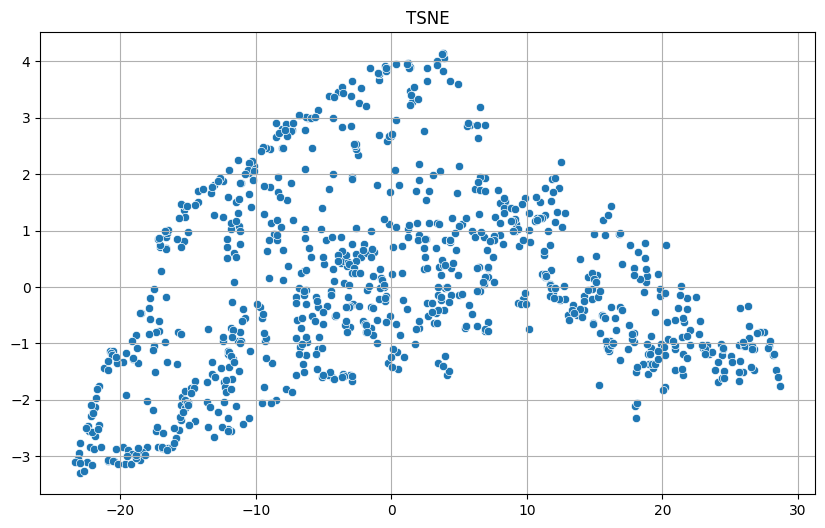

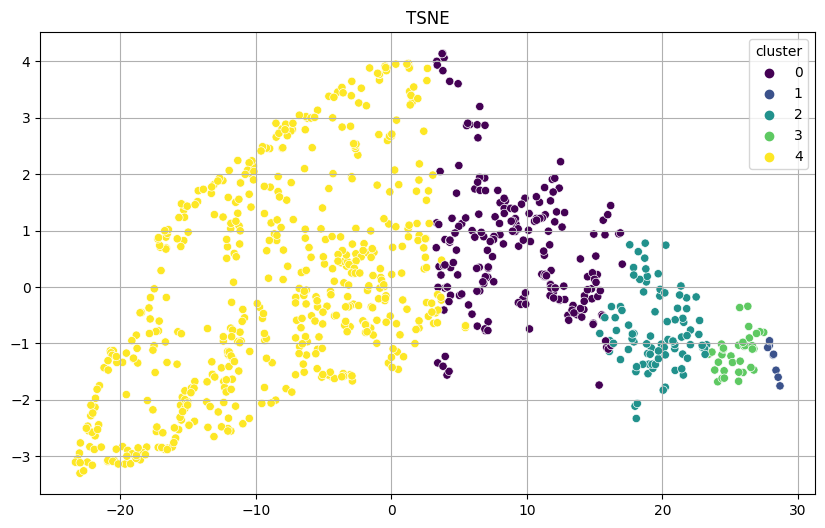

In [39]:
#tsne na wariancie mod
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=4324)
tsne_results = tsne.fit_transform(mod)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('TSNE')
plt.grid()
plt.show()

#scatter plot na 5 klastrów
kmeans = KMeans(n_clusters=5, random_state=4324)
kmeans.fit(mod)
mod['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=mod['cluster'], palette='viridis')
plt.title('TSNE')
plt.grid()
plt.show()

### Porównajmy jakość dla 5 klastrów

In [40]:
kmeans = KMeans(n_clusters=5, random_state=42)

sets = [v1, v2, v3, v4, mod]
for s in sets:
    s["cluster"] = kmeans.fit_predict(s)
    silhouette_avg = silhouette_score(s, s["cluster"])
    var_name = [name for name, var in locals().items() if var is s][0]

    print(f"silhouette_avg for {var_name}: {silhouette_avg}" )


silhouette_avg for df_log_scaled: 0.19646111324981563
silhouette_avg for df_log_normalized: 0.5422131521857219
silhouette_avg for df_normalized_scaled: 0.5379940815130809
silhouette_avg for v4: 0.5547111522739406
silhouette_avg for _: 0.5547111522739905


### Wstępna funkcja rekomendująca

In [41]:
def recommend_similar_movies(movie_title, n_recommendations=5):
    kmeans = KMeans(n_clusters=5, random_state=42)
    df["cluster"] = kmeans.fit_predict(df[features])
    movie_cluster = df[df["movie_title"] == movie_title]["cluster"].values[0]
    similar_movies = df[(df["cluster"] == movie_cluster) & (df["movie_title"] != movie_title)]
    return similar_movies.sample(n=n_recommendations)

In [42]:
recommend_similar_movies("Avengers: Endgame")

IndexError: index 0 is out of bounds for axis 0 with size 0